# Capstone 2: Obesity in America
## Modeling

The goal of this step is to create a model that predicts the risk of obesity based on risk factors

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

In [3]:
cd data

/Users/erinquense/springboard/Capstone2Project/data


In [4]:
df = pd.read_csv('df_for_model_fitting.csv', index_col=0)

In [5]:
df.head(3)

,% who have obesity,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 or older,College graduate,High school graduate,Less than high school,...,mod_active__Medium,mod_active__No Data Reported,mod_active__Very High,mod_active__Very Low,fruit__High,fruit__Low,fruit__Medium,fruit__No Data Reported,fruit__Very High,fruit__Very Low
0,19.8,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,23.5,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,29.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
df.shape

(8153, 95)

### Train/Test Split

In [7]:
X = df.drop(['% who have obesity'], axis=1).values    # features
y = df['% who have obesity'].values                   # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [9]:
print("X_train: ", type(X_train), X_train.shape)
print("y_train: ", type(y_train), y_train.shape)
print("X_test: ", type(X_test), X_test.shape)
print("y_test: ", type(y_test), y_test.shape)

X_train:  <class 'numpy.ndarray'> (6114, 94)
y_train:  <class 'numpy.ndarray'> (6114, 1)
X_test:  <class 'numpy.ndarray'> (2039, 94)
y_test:  <class 'numpy.ndarray'> (2039, 1)


### Model 1

In [10]:
Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression()

In [11]:
#Evaluate Model 1: R-squared
print('R^2 Score for training set:', Model1.score(X_train, y_train))
print('R^2 Score for test set:', Model1.score(X_test, y_test))

R^2 Score for training set: 0.755079550098926
R^2 Score for test set: 0.723661103666446


In [12]:
# how do I get MAE for the training and test set?  I got it for the prediction below.

#### Make Predictions using Model 1

In [13]:
# Use the model to make predictions about our test data
y_pred1 = Model1.predict(X_test)

In [14]:
print('Mean Absolute Error for prediction is:', mean_absolute_error(y_test, y_pred1))
print('R^2 Score for prediction is:', r2_score(y_test, y_pred1))

Mean Absolute Error for prediction is: 2.4691481791192516
R^2 Score for prediction is: 0.723661103666446


### Model 2: OLS

In [16]:
X = df.drop(['% who have obesity'], axis=1).values    
X = sm.add_constant(X)

y = df['% who have obesity'].values 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [18]:
# Create the model
Model2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
Model2_results = Model2.fit()

In [19]:
Model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:37:47   Log-Likelihood:                -16195.
No. Observations:                6114   AIC:                         3.257e+04
Df Residuals:                    6022   BIC:                         3.319e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3298      0.630     33.854      0.000      20.095      22.565
x1           -12.3323      0.323    -38.176      0.000     -12.966     -11.699
x2            -1.4919      0.318     -4.686      0.000      -2.116      -0.868
x3             3.8589      0.321     12.021      0.000       3.230       4.488
x4             5.0758      0.313     16.226      0.000       4.463       5.689
x5             5.1435      0.319     16.099      0.000       4.517       5.770
x6            -1.8251      0.324     -5.640      0.000      -2.459      -1.191
x7            -5.4373      0.325    -16.746      0.000      -6.074      -4.801
x8             2.0912      0.318      6.583      0.000       1.468       2.714
x9             3.9012      0.325     12.007      0.000       3.264       4.538
x10            1.5660      0.318      4.917      0.000       0.942       2.190
x11           -0.1187      0.321     -0.369      0.712      -0.749       0.511
x12            0.1531      0.315      0.485      0.627      -0.465       0.772
x13            3.2960      0.319     10.326      0.000       2.670       3.922
x14            1.7611      0.319      5.515      0.000       1.135       2.387
x15            1.7592      0.314      5.595      0.000       1.143       2.376
x16            0.9846      0.320      3.081      0.002       0.358       1.611
x17           -2.9220      0.327     -8.943      0.000      -3.563      -2.281
x18           -4.4420      0.317    -14.026      0.000      -5.063      -3.821
x19            4.8345      0.323     14.955      0.000       4.201       5.468
x20            2.2582      0.326      6.917      0.000       1.618       2.898
x21            6.7787      0.358     18.953      0.000       6.078       7.480
x22          -18.2224      0.362    -50.379      0.000     -18.932     -17.513
x23            9.3415      0.855     10.927      0.000       7.666      11.017
x24            1.8437      0.326      5.650      0.000       1.204       2.483
x25            7.9334      0.337     23.553      0.000       7.273       8.594
x26           -1.5509      0.318     -4.879      0.000      -2.174      -0.928
x27           -1.6179      0.431     -3.751      0.000      -2.464      -0.772
x28            4.1800      0.321     13.028      0.000       3.551       4.809
x29           -0.0289      0.331     -0.087      0.930      -0.677       0.619
x30           -0.7525      0.311     -2.421      0.016      -1.362      -0.143
x31            5.2732      0.321     16.433      0.000       4.644       5.902
x32           -3.0472      0.308     -9.885      0.000      -3.652      -2.443
x33           -6.5070      0.320    -20.305      0.000      -7.135      -5.879
x34           -2.0143      0.310     -6.496      0.000      -2.622      -1.406
x35            0.9266      0.323      2.870      0.004       0.294       1.560
x3

### Model 3: Ridge Regression

In [24]:
rr = Ridge() 
rr.fit(X_train, y_train)

Ridge()

In [25]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [26]:
print(rr.score(X_train,y_train))
print(rr.score(X_test, y_test))

0.7550192646398681
0.7235088427915919


In [27]:
print(rr100.score(X_train,y_train))
print(rr100.score(X_test, y_test))

0.6570391082531795
0.6281731504462505


In [33]:
y_pred3 = rr.predict(X_test)

In [35]:
print('Mean Absolute Error for prediction is:', mean_absolute_error(y_test, y_pred3))
print('R^2 Score for prediction is:', r2_score(y_test, y_pred3))

Mean Absolute Error for prediction is: 2.471337615351915
R^2 Score for prediction is: 0.7235088427915919


### Model 4: Lasso Regression

In [31]:
lassr = Lasso(alpha=0.01)
lassr.fit(X_train, y_train)

Lasso(alpha=0.01)

In [32]:
print(lassr.score(X_train,y_train))
print(lassr.score(X_test, y_test))

0.7455815618139383
0.7150295915260441


In [36]:
y_pred4 = lassr.predict(X_test)

In [37]:
print('Mean Absolute Error for prediction is:', mean_absolute_error(y_test, y_pred4))
print('R^2 Score for prediction is:', r2_score(y_test, y_pred4))

Mean Absolute Error for prediction is: 2.5546954027039988
R^2 Score for prediction is: 0.7150295915260441


### Visualization Model 1

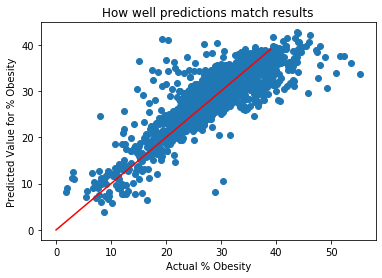

In [48]:
_ = plt.scatter(y_test,y_pred1)
plt.xlabel('Actual % Obesity')
plt.ylabel('Predicted Value for % Obesity')
plt.title('How well predictions match results')
plt.plot([x for x in range(0,40)],[x for x in range(0,40)], color='red')
plt.show()

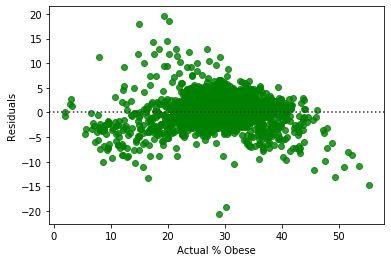

In [76]:
sns.residplot(y_test, y_pred1, color='green')
plt.xlabel('Actual % Obese')
plt.ylabel('Residuals')
plt.show()

In [77]:
residual = (y_test-y_pred1)

In [78]:
std = residual.std()
mean = residual.mean()
max_ = mean + std
min_ = mean - std
print(max_, min_)

3.7123034075173966 -3.575383518739774


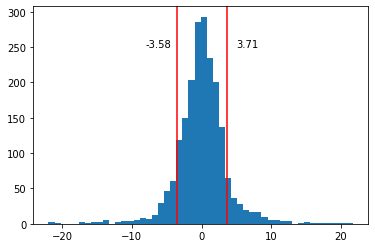

In [90]:
_ = plt.hist(residual, bins=50)
plt.axvline(min_, color='r')
plt.axvline(max_, color='r')
plt.text(5, 250, max_.round(decimals=2))
plt.text(-8, 250, min_.round(decimals=2))
plt.show()